<a href="https://colab.research.google.com/github/dmzapata1/Ciencia_de_Datos/blob/main/Proyecto_Drug200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder



In [3]:
df = pd.read_csv('/content/drive/MyDrive/A2_MACHINE_LEARNING/CAPITULO_3_CLASIFICADOR/drug200.csv')

In [4]:
df.head(1)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY


# Análisis Exploratorio

In [5]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe(percentiles = [0.01, 0.05, .25, .75, .95, .99])

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
1%,15.000000,6.768140
5%,18.950000,7.796150
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
95%,70.100000,30.623900


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Na_to_K'}>]], dtype=object)

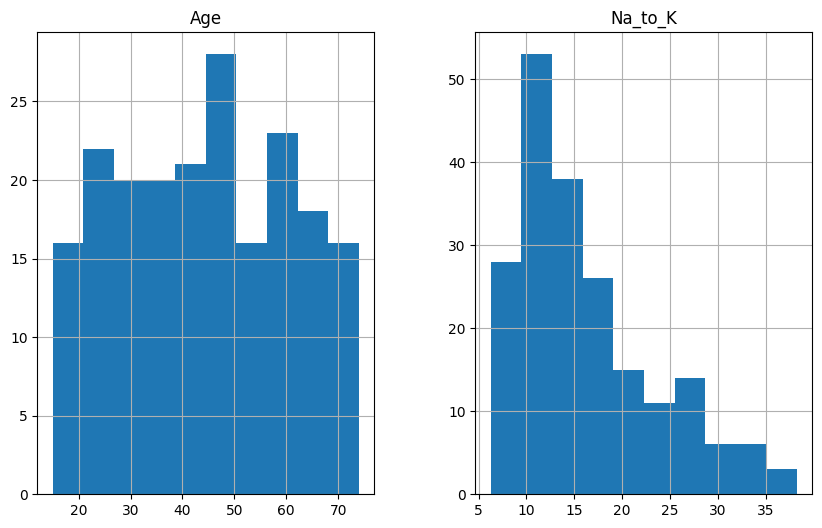

In [8]:
df.hist(figsize = (10,6))

## Edad

<Figure size 1000x600 with 0 Axes>

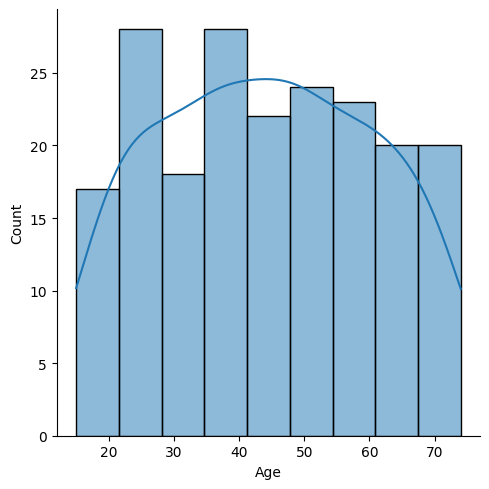

In [9]:
plt.figure(figsize=(10,6))
sns.displot(df['Age'], kde=True)

<Axes: >

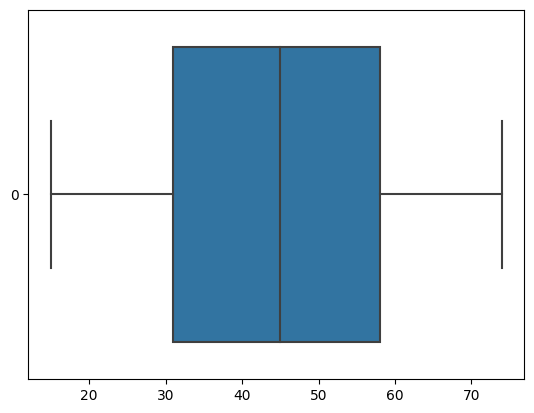

In [10]:
sns.boxplot(df['Age'], orient = 'horizontal')

## Género

In [11]:
df.head(1)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY


<Axes: xlabel='Sex', ylabel='count'>

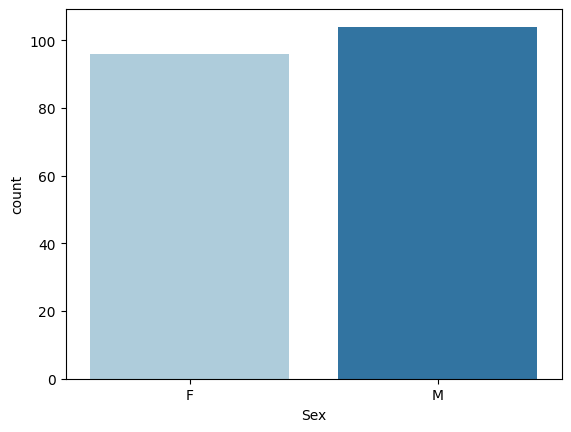

In [12]:
sns.countplot(x='Sex', data=df, palette='Paired')

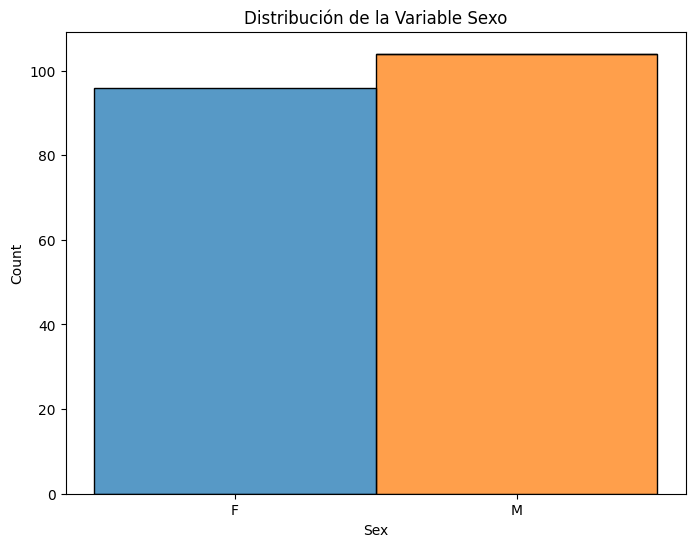

In [13]:
plt.figure(figsize=(8, 6))

# Crea un histograma con Seaborn sin etiquetas en la leyenda
sns.histplot(x='Sex', data=df, hue='Sex', multiple='stack', legend=False)

plt.title('Distribución de la Variable Sexo')
plt.show()


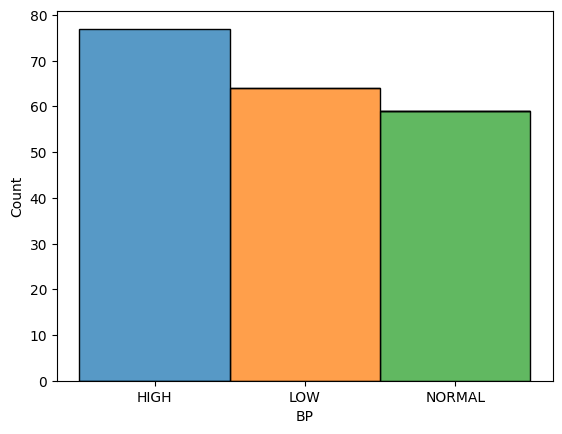

In [14]:
sns.histplot(data=df, x='BP', hue='BP', legend=False, multiple='stack');

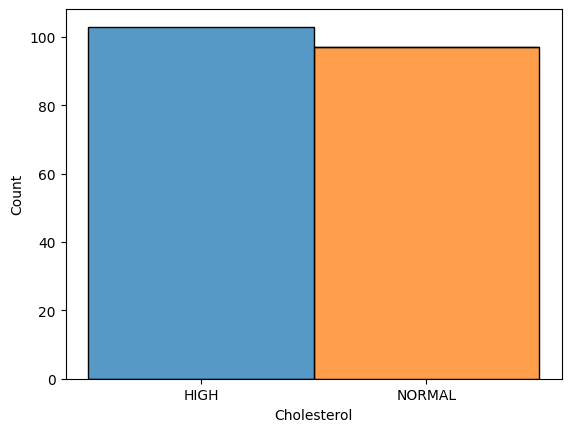

In [15]:
sns.histplot(data=df, x='Cholesterol', hue='Cholesterol', legend=False, multiple='stack');

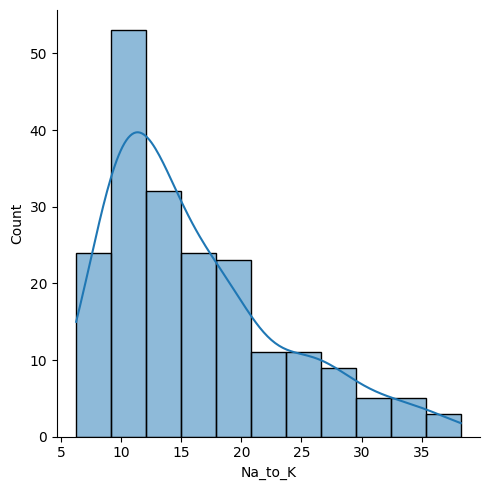

In [16]:
sns.displot(df.Na_to_K, kde=True);

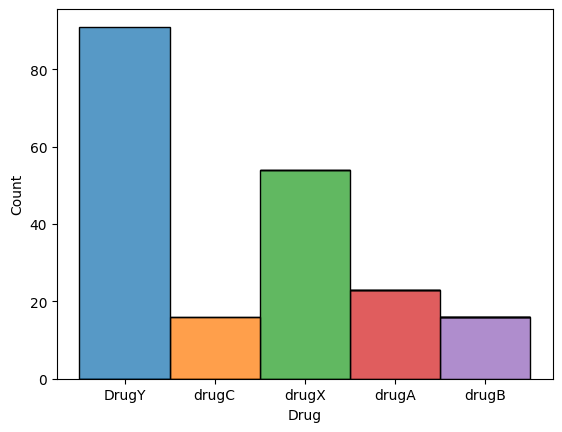

In [17]:
# Medicamentos
sns.histplot(data=df, x='Drug', hue='Drug', legend=False, multiple='stack');

# Gráficas por Pares

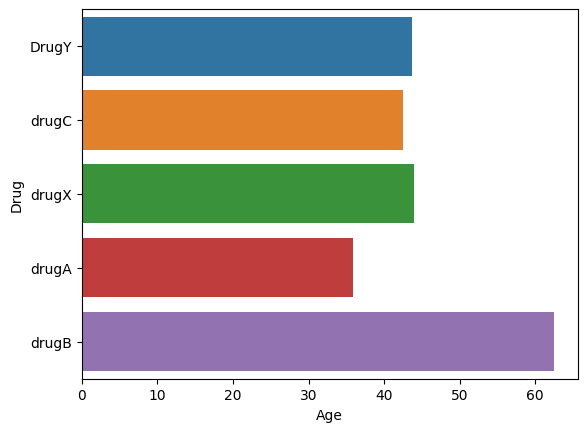

In [18]:
sns.barplot(x=df['Age'],y=df['Drug'], errorbar = None);

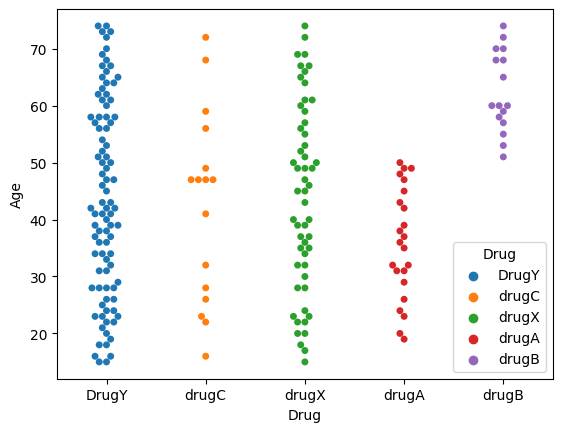

In [19]:
sns.swarmplot(x='Drug', y='Age', data=df, hue='Drug');

In [20]:
# Medicamento vs Género
df_sex_drug = df.groupby(['Drug','Sex']).size().reset_index(name='Count')
df_sex_drug

,Drug,Sex,Count
0,DrugY,F,47
1,DrugY,M,44
2,drugA,F,9
3,drugA,M,14
4,drugB,F,6
5,drugB,M,10
6,drugC,F,7
7,drugC,M,9
8,drugX,F,27
9,drugX,M,27


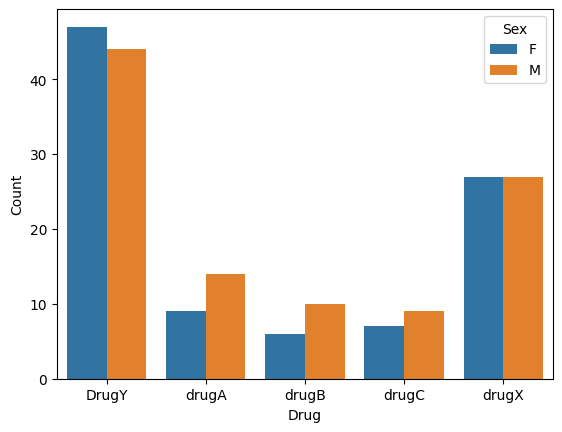

In [21]:
sns.barplot(x='Drug',y='Count',hue='Sex',data=df_sex_drug);

In [22]:
df.head(1)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY


In [23]:
# Cholesterol vs Sexo
df_sex_chol = df.groupby(['Cholesterol','Sex']).size().reset_index(name='Count')

In [24]:
df_sex_chol

,Cholesterol,Sex,Count
0,HIGH,F,49
1,HIGH,M,54
2,NORMAL,F,47
3,NORMAL,M,50


<Axes: xlabel='Cholesterol', ylabel='Count'>

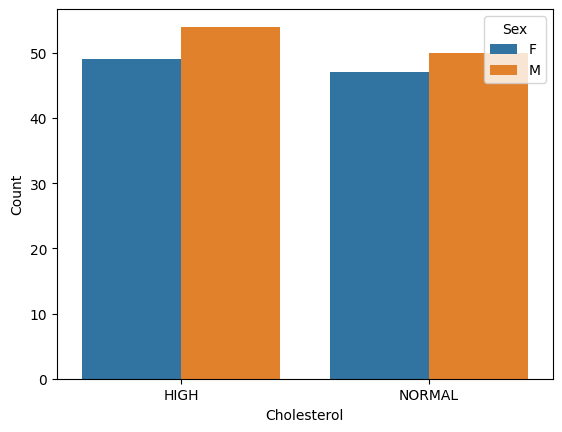

In [25]:
sns.barplot(x='Cholesterol', y = 'Count', hue='Sex', data=df_sex_chol)

In [26]:
df_drug_NaK = df.groupby('Drug')['Na_to_K'].mean().reset_index(name='NaK_Prom')
df_drug_NaK

,Drug,NaK_Prom
0,DrugY,22.374780
1,drugA,10.918783
2,drugB,11.524375
3,drugC,10.633750
4,drugX,10.650556


<Axes: xlabel='Drug', ylabel='NaK_Prom'>

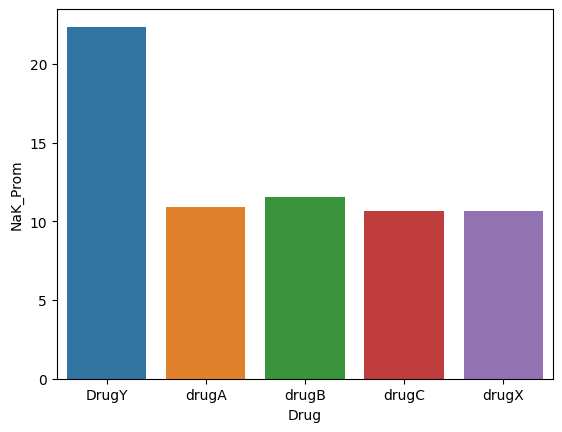

In [27]:
sns.barplot(x='Drug', y='NaK_Prom', data=df_drug_NaK)

In [28]:
# Presión vs Medicamento
df_bp_drug = df.groupby('Drug')['BP'].size().reset_index()

In [29]:
df_bp_drug

,Drug,BP
0,DrugY,91
1,drugA,23
2,drugB,16
3,drugC,16
4,drugX,54


<Axes: xlabel='Drug', ylabel='BP'>

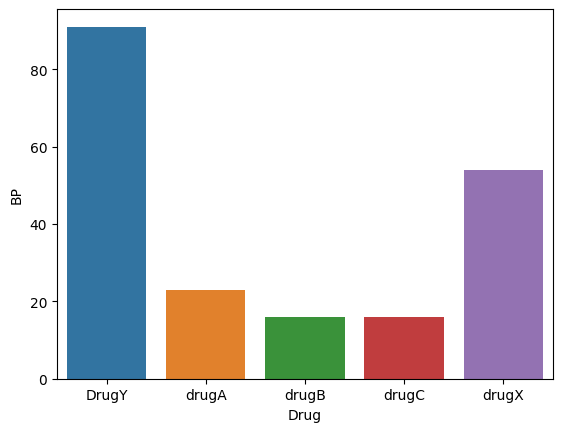

In [30]:
sns.barplot(x='Drug', y='BP', data=df_bp_drug)

In [31]:
df_bp_drug_2 = df.groupby(['Drug','BP']).size().reset_index(name='Count')

In [32]:
df_bp_drug_2

,Drug,BP,Count
0,DrugY,HIGH,38
1,DrugY,LOW,30
2,DrugY,NORMAL,23
3,drugA,HIGH,23
4,drugB,HIGH,16
5,drugC,LOW,16
6,drugX,LOW,18
7,drugX,NORMAL,36


<Axes: xlabel='Drug', ylabel='Count'>

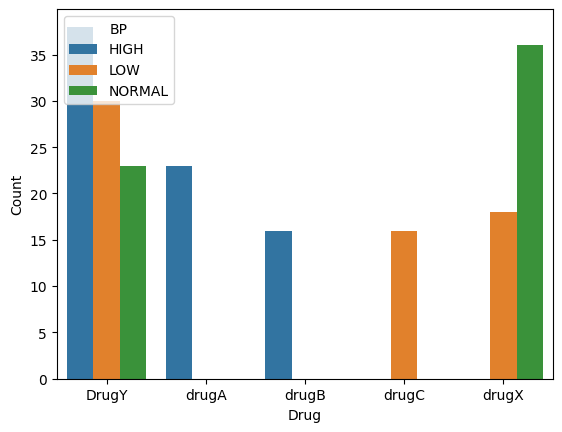

In [33]:
sns.barplot(data=df_bp_drug_2, x='Drug', y='Count', hue='BP')

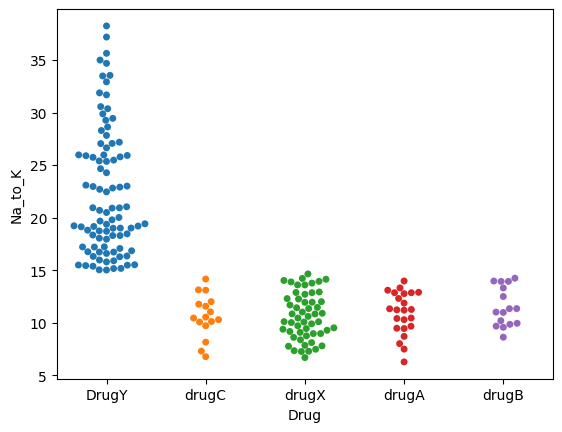

In [34]:
# Sodio-Potasio vs Medicamentos
sns.swarmplot(x='Drug', y='Na_to_K', hue='Drug', data=df, legend=False);

# Limpieza de Datos

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
def label_encoder(datos_categoria):
  le=LabelEncoder()
  df[datos_categoria] = le.fit_transform(df[datos_categoria])

In [37]:
df.head(1)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY


In [38]:
variables = ['Sex', 'BP', 'Na_to_K', 'Drug', 'Cholesterol']

In [39]:
for i in variables:
  label_encoder(i)

In [40]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,167,0
1,47,1,1,0,89,3
2,47,1,1,0,43,3
3,28,0,2,0,10,4
4,61,0,1,0,133,0
...,...,...,...,...,...,...
195,56,0,1,0,69,3
196,16,1,1,0,75,3
197,52,1,2,0,36,4
198,23,1,2,1,102,4


# Train Test Split

In [41]:
X = df.drop('Drug', axis=1)
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,167
1,47,1,1,0,89
2,47,1,1,0,43
3,28,0,2,0,10
4,61,0,1,0,133
...,...,...,...,...,...
195,56,0,1,0,69
196,16,1,1,0,75
197,52,1,2,0,36
198,23,1,2,1,102


In [42]:
y = df.Drug
y

0      0
1      3
2      3
3      4
4      0
      ..
195    3
196    3
197    4
198    4
199    4
Name: Drug, Length: 200, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42, shuffle=True)

In [45]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((160, 5), (160,), (40, 5), (40,))

# Modelo de Clasificación Binario

In [46]:
# Es medicina y o no es medicina y.

In [47]:
y_train_y = y_train ==0

In [48]:
y_train_y

79     False
197    False
38     False
24      True
122     True
       ...  
106    False
14     False
92      True
179     True
102    False
Name: Drug, Length: 160, dtype: bool

In [49]:
y_test_y = y_test==0

In [50]:
y_test_y

95     False
15      True
30     False
158    False
128     True
115     True
69      True
170    False
174    False
45     False
66     False
182    False
165     True
78     False
186    False
177     True
56     False
152    False
82     False
68      True
124    False
16     False
148    False
93      True
65      True
60      True
84     False
67     False
125     True
132    False
9       True
18     False
55     False
75      True
150    False
104     True
135    False
137    False
164     True
76     False
Name: Drug, dtype: bool

In [51]:
# Aplicamos los modelos

In [52]:
# Modelo SGD Stochastic Gradient Descending
from sklearn.linear_model import SGDClassifier

In [53]:
sgd = SGDClassifier()

In [54]:
sgd.fit(x_train, y_train_y)

SGDClassifier()

In [55]:
x_train.loc[0]

Age             23
Sex              0
BP               0
Cholesterol      0
Na_to_K        167
Name: 0, dtype: int64

In [56]:
 y_train_y[0]

True

In [57]:
df.head(1)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,167,0


In [58]:
sgd.predict([x_train.loc[0]]), y_train_y.loc[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


(array([ True]), True)

In [59]:
sgd.predict([x_train.loc[20]]), y_train_y.loc[20]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


(array([ True]), True)

# Medidas de Desempeño

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
resultados = cross_val_score(sgd,x_train,y_train_y, cv=3, scoring='accuracy')

In [62]:
resultados

array([0.77777778, 0.86792453, 0.81132075])

In [63]:
resultados.mean()

0.8190076869322153

# Matriz de Confusion

In [64]:
from sklearn.model_selection import cross_val_predict

In [65]:
y_train_pred =  cross_val_predict(sgd,x_train, y_train_y, cv=3)

In [66]:
y_train_pred

array([False, False, False,  True,  True, False,  True,  True, False,
       False, False,  True, False, False, False,  True, False,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
        True, False,  True, False, False,  True,  True, False, False,
       False, False, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
       False,  True, False, False,  True, False,  True,  True,  True,
        True, False, False,  True, False, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True, False, False,
        True, False,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True, False, False, False, False,
        True, False, False, False,  True,  True,  True,  True, False,
        True,  True,  True, False,  True, False,  True, False, False,
        True,  True,

In [67]:
y_pred = pd.DataFrame(y_train_pred)

In [68]:
y_pred

,0
0,False
1,False
2,False
3,True
4,True
...,...
155,True
156,False
157,True
158,False


In [69]:
y_train_real = pd.DataFrame(y_train_y)

In [70]:
y_train_real

,Drug
79,False
197,False
38,False
24,True
122,True
...,...
106,False
14,False
92,True
179,True


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


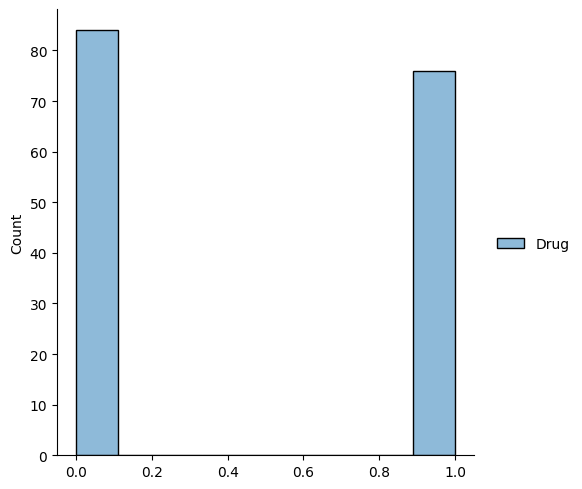

In [71]:
sns.displot(y_train_real)

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


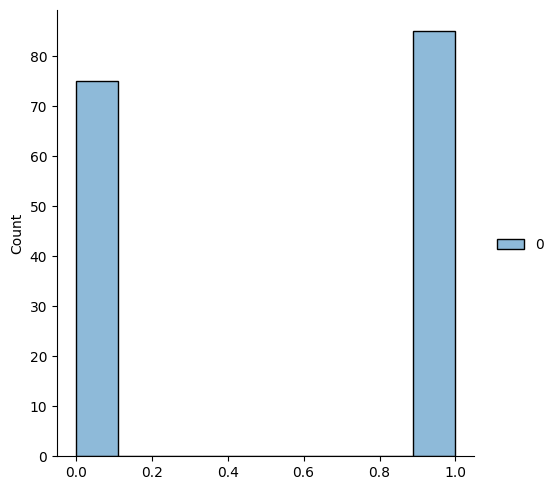

In [72]:
sns.displot(y_pred)

In [73]:
# Matriz de Confusion

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
confusion_matrix(y_train_y,y_train_pred)

array([[68, 16],
       [ 7, 69]])

In [76]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(y_train_y,y_train_pred))

              precision    recall  f1-score   support

       False       0.91      0.81      0.86        84
        True       0.81      0.91      0.86        76

    accuracy                           0.86       160
   macro avg       0.86      0.86      0.86       160
weighted avg       0.86      0.86      0.86       160



In [78]:
from sklearn.metrics import precision_score, recall_score

In [79]:
p = precision_score(y_train_y, y_train_pred)

In [80]:
r = recall_score(y_train_y, y_train_pred)

In [81]:
p,r

(0.8117647058823529, 0.9078947368421053)

## Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rfc = RandomForestClassifier(random_state=42)

In [84]:
rfc.fit(x_train, y_train_y)

RandomForestClassifier(random_state=42)

In [85]:
y_train_pred = cross_val_predict(rfc,x_train,y_train_y,cv=3)

In [86]:
confusion_matrix(y_train_y, y_train_pred)

array([[84,  0],
       [ 2, 74]])

In [87]:
print(classification_report(y_train_y, y_train_pred))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99        84
        True       1.00      0.97      0.99        76

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160



In [88]:
p = precision_score(y_train_y, y_train_pred)
r = recall_score(y_train_y, y_train_pred)

In [89]:
p,r

(1.0, 0.9736842105263158)

In [90]:
# Umbrales entre precision y recall

In [91]:
y_scores = cross_val_predict(sgd,x_train,y_train_y,cv=3,method='decision_function')

In [92]:
from sklearn.metrics import precision_recall_curve

In [93]:
precisions, recalls, umbrales = precision_recall_curve(y_train_y, y_scores)

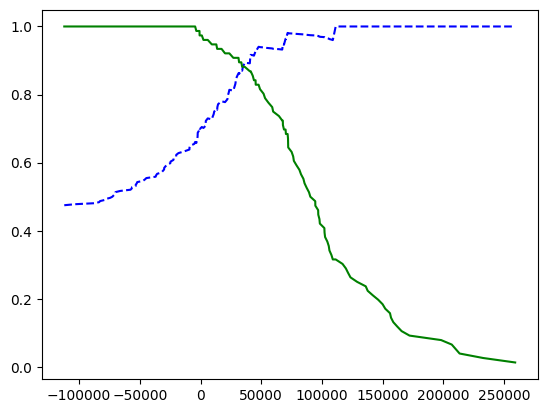

In [94]:
plt.plot(umbrales, precisions[:-1],'b--', label='precision')
plt.plot(umbrales,recalls[:-1],'g-', label='recall')
plt.show()

In [95]:
from sklearn.metrics import roc_curve, auc

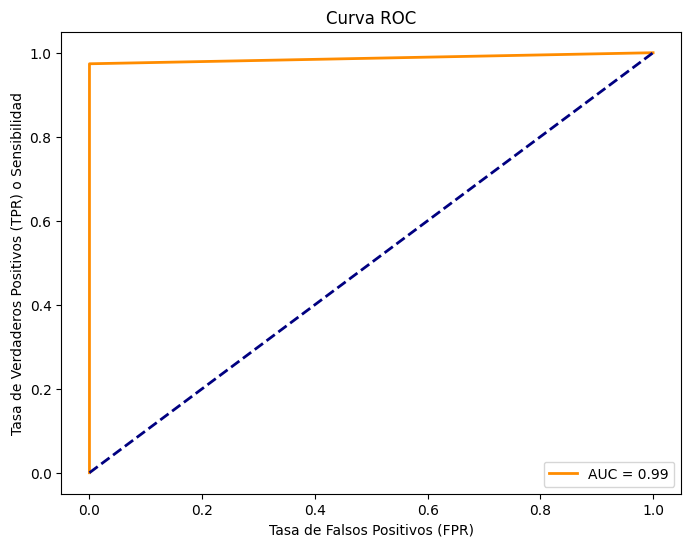

In [96]:
# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, _ = roc_curve(y_train_y, y_train_pred)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR) o Sensibilidad')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [97]:
from sklearn.metrics import roc_auc_score

In [98]:
roc_auc_score(y_train_y, y_train_pred)

0.986842105263158

# Multiclase

## Support Vector Machine

In [99]:
from sklearn.svm import SVC

In [100]:
svm = SVC()

In [101]:
svm.fit(x_train, y_train)

SVC()

In [102]:
svm.predict([x_train.loc[0]]), y_train.loc[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


(array([0]), 0)

In [103]:
# Por default usa el multiclase One vs One

In [104]:
svm.decision_function([x_train.loc[0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 4.29314545,  1.79128957,  0.76838448, -0.27065817,  3.16462775]])

In [105]:
# Duda entre ser medicina 0 o 4

In [106]:
# Forzamos a usar OneVsRest
from sklearn.multiclass import OneVsRestClassifier

In [109]:
svc = SVC()

In [110]:
svm = OneVsRestClassifier(svc)

In [111]:
svm.fit(x_train,y_train)

OneVsRestClassifier(estimator=SVC())

In [112]:
svm.predict([x_train.loc[0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [114]:
svm.decision_function([x_train.loc[0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 2.31466773, -1.01816059, -1.01847764, -1.00071976, -1.08034559]])

## Usamos SGD Multiclase

In [115]:
x_train

,Age,Sex,BP,Cholesterol,Na_to_K
79,32,0,1,1,54
197,52,1,2,0,36
38,39,0,2,1,33
24,33,0,1,0,191
122,34,1,2,0,158
...,...,...,...,...,...
106,22,1,2,0,74
14,50,0,2,0,80
92,29,0,0,0,184
179,67,0,2,0,118


In [116]:
y_train

79     4
197    4
38     4
24     0
122    0
      ..
106    4
14     4
92     0
179    0
102    3
Name: Drug, Length: 160, dtype: int64

In [117]:
sgd.fit(x_train,y_train)

SGDClassifier()

In [118]:
sgd.predict([x_train.loc[0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([0])

In [119]:
sgd.decision_function([x_train.loc[0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[ 26874.54059678, -26946.8233629 , -37801.91648613,
        -47443.21200668, -34820.36140994]])

## Random Forest Multiclasificador

In [120]:
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [121]:
rfc.predict([x_train.loc[0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [123]:
y_train_pred = cross_val_predict(rfc,x_train,y_train,cv=3)

In [124]:
conf_mz = confusion_matrix(y_train,y_train_pred)

In [126]:
conf_mz

array([[75,  0,  0,  1,  0],
       [ 0, 17,  0,  0,  0],
       [ 0,  1, 12,  0,  0],
       [ 0,  0,  0,  7,  4],
       [ 0,  0,  0,  0, 43]])

In [127]:
y_test_pred = rfc.predict(x_test)

In [128]:
conf_mz_test = confusion_matrix(y_test,y_test_pred)

In [129]:
conf_mz_test

array([[15,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  5,  0],
       [ 0,  0,  0,  0, 11]])

In [130]:
# SGD

In [131]:
y_train_pred = cross_val_predict(sgd,x_train,y_train,cv=3)

In [132]:
sgd_conf_mz = confusion_matrix(y_train, y_train_pred)

In [133]:
sgd_conf_mz

array([[67,  0,  0,  6,  3],
       [ 7,  0,  1,  7,  2],
       [ 1,  0,  1,  6,  5],
       [ 3,  0,  0,  3,  5],
       [11,  0,  0, 10, 22]])

In [134]:
y_test_pred = sgd.predict(x_test)

In [135]:
conf_mz_test = confusion_matrix(y_test,y_test_pred)

In [136]:
conf_mz_test

array([[15,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  2],
       [ 1,  0,  0,  0,  4],
       [ 5,  0,  0,  0,  6]])

In [ ]:
# Conclusión: Random Forest Multiclasificador es el modelo seleccionado.